In [50]:
!pip install requests
!pip install requests-html

# data  debugging

In [2]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Call a progress bar function because there is too much data to crawl
from tqdm import tqdm

In [2]:
from requests_html import HTMLSession

In [3]:
session = HTMLSession()

In [46]:
def get_data():
    for i in tqdm(range(1,189)):
        res = session.get(
            # Access this url to obtain json data
            # Get the data returned by the url interface
            url="https://api.bilibili.com/x/web-interface/popular/series/one?number={}".format(i)
        )
        js = res.json()
        # Read each video information of the json file and store it in a list 
        all_data=[]
        week = i
        videos = js["data"]["list"]
        for rank, video in enumerate(videos):
            all_data.append(
                [
                    week,
                    rank + 1,
                    video["aid"],
                    video["tname"],
                    video["title"],
                    video["pubdate"],
                    video["owner"]["mid"],
                    video["owner"]["name"],
                    video["owner"]["face"],
                    video["pic"],
                    video["stat"]["view"],
                    video["stat"]["danmaku"],
                    video["stat"]["reply"],
                    video["stat"]["favorite"],
                    video["stat"]["coin"],
                    video["stat"]["share"],
                    video["stat"]["like"],
                    video["short_link"],
                    video["bvid"],
                    video["rcmd_reason"],
                ]
            )
        # MAC system needs to add the path of the file location
        src_data = pd.read_excel("/Users/a749/demo!!!/hot_week.xlsx")
        data = pd.DataFrame(all_data,columns=["week", "rank", "aid", "tname", "title", "pubdate", "owner_mid", "owner_name",
                                     "owner_face", "pic", "view", "danmaku", "reply", "favorite", "coin",
                                     "share", "like", "link", "bvid", "rcmd_reason"])
        pd.DataFrame(src_data).append(data).to_excel("/Users/a749/demo!!!/hot_week.xlsx", index=False)

In [47]:
get_data()

100%|███████████████████████████████████████████| 20/20 [02:11<00:00,  6.59s/it]


# data cleaning

In [3]:
# 1.read the raw data；
data = pd.read_excel("./hot_week.xlsx")

In [4]:
# 2.obtain all the columns；
data.columns

Index(['week', 'rank', 'aid', 'tname', 'title', 'pubdate', 'owner_mid',
       'owner_name', 'owner_face', 'pic', 'view', 'danmaku', 'reply',
       'favorite', 'coin', 'share', 'like', 'link', 'bvid', 'rcmd_reason'],
      dtype='object')

In [5]:
# 3.extract target columns；
need_columns = ['week','tname', 'title', 'owner_name','view', 'danmaku', 'reply','favorite', 'coin', 'share', 'like']
need_data = pd.DataFrame(data, columns=need_columns)

In [6]:
# 4.create new DataFrame
need_data

,week,tname,title,owner_name,view,danmaku,reply,favorite,coin,share,like
0,1,出行,这集vlog我们拍了十年，致最美好的青春,AresserA-Vlog,4934403,67382,21975,243534,546767,205686,493209
1,1,三农,华农兄弟：兄弟家的鱼跑河里去了，帮他网回来，一网下去还不少,华农兄弟,2535303,21640,5646,4715,28421,2625,75389
2,1,影视剪辑,【性转版】回家的诱惑,兰彻lancche,4633167,43298,12852,154079,213400,157577,243609
3,1,单机游戏,【敖厂长】20年前此暴力游戏火遍中国,敖厂长,5733941,16781,9186,51450,194078,8947,207345
4,1,动漫杂谈,哆啦A梦结局背后的秘密？从未播出的黑历史？真相出人意料,瓶子君152,2486880,4859,3352,53455,133310,4190,155908
...,...,...,...,...,...,...,...,...,...,...,...
5931,188,鬼畜调教,很难想象这个女人吸猫时候的精神状态,还有一天就放假了,1109022,423,1119,16727,6579,12468,114512
5932,188,三农,没说过话还喜欢带耳机、这条视频可以证明我不是聋哑女孩,灰太狼的羊,1152219,2320,2599,6182,11577,1272,154192
5933,188,日常,当我彻底放弃减肥两年后。。。,nya酱的一生,980670,3561,1638,6303,21900,7394,63333
5934,188,影视杂谈,第7届某瓣电影年度榜单冷门佳片《给我翅膀》，帧帧壁纸，治愈一切！,7块电影,1163803,1872,660,16103,8607,3166,83179


In [46]:
need_data['tname'] =need_data['tname'].replace('出行', '生活')# 整合“生活”类
need_data['tname'] =need_data['tname'].replace('搞笑', '生活')
need_data['tname'] =need_data['tname'].replace('三农', '生活') 
need_data['tname'] =need_data['tname'].replace('家居房产', '生活')
need_data['tname'] =need_data['tname'].replace('手工', '生活')
need_data['tname'] =need_data['tname'].replace('绘画', '生活')
need_data['tname'] =need_data['tname'].replace('日常', '生活')
need_data['tname'] =need_data['tname'].replace('连载动画', '番剧') # 整合“番剧”类
need_data['tname'] =need_data['tname'].replace('完结动画', '番剧') 
need_data['tname'] =need_data['tname'].replace('资讯', '番剧') 
need_data['tname'] =need_data['tname'].replace('官方延伸', '番剧') 
need_data['tname'] =need_data['tname'].replace('MAD·AMV', '动画') # 整合“动画”类
need_data['tname'] =need_data['tname'].replace('MMD·3D', '动画')
need_data['tname'] =need_data['tname'].replace('短片·手书·配音', '动画')
need_data['tname'] =need_data['tname'].replace('手办·模玩', '动画')
need_data['tname'] =need_data['tname'].replace('特摄', '动画')
need_data['tname'] =need_data['tname'].replace('动漫杂谈', '动画')
need_data['tname'] =need_data['tname'].replace('综合', '动画')
need_data['tname'] =need_data['tname'].replace('国产动画', '国创')# 整合“国创”类
need_data['tname'] =need_data['tname'].replace('国产原创相关', '国创')
need_data['tname'] =need_data['tname'].replace('布袋戏', '国创')
need_data['tname'] =need_data['tname'].replace('动态漫·广播剧', '国创')
need_data['tname'] =need_data['tname'].replace('原创音乐', '音乐')# 整合“音乐”类
need_data['tname'] =need_data['tname'].replace('翻唱', '音乐')
need_data['tname'] =need_data['tname'].replace('演奏', '音乐')
need_data['tname'] =need_data['tname'].replace('VOCALOID·UTAU', '音乐')
need_data['tname'] =need_data['tname'].replace('音乐现场', '音乐')
need_data['tname'] =need_data['tname'].replace('MV', '音乐')
need_data['tname'] =need_data['tname'].replace('乐评盘点', '音乐')
need_data['tname'] =need_data['tname'].replace('音乐教学', '音乐')
need_data['tname'] =need_data['tname'].replace('音乐综合', '音乐')
need_data['tname'] =need_data['tname'].replace('宅舞', '舞蹈')# 整合“舞蹈”类
need_data['tname'] =need_data['tname'].replace('街舞', '舞蹈')
need_data['tname'] =need_data['tname'].replace('明星舞蹈', '舞蹈')
need_data['tname'] =need_data['tname'].replace('中国舞', '舞蹈')
need_data['tname'] =need_data['tname'].replace('舞蹈综合', '舞蹈')
need_data['tname'] =need_data['tname'].replace('舞蹈教程', '舞蹈')
need_data['tname'] =need_data['tname'].replace('单机游戏', '游戏')# 整合“游戏”类
need_data['tname'] =need_data['tname'].replace('电子竞技', '游戏')
need_data['tname'] =need_data['tname'].replace('手机游戏', '游戏')
need_data['tname'] =need_data['tname'].replace('网络游戏', '游戏')
need_data['tname'] =need_data['tname'].replace('桌游棋牌', '游戏')
need_data['tname'] =need_data['tname'].replace('GMV', '游戏')
need_data['tname'] =need_data['tname'].replace('音游', '游戏')
need_data['tname'] =need_data['tname'].replace('Mugen', '游戏')
need_data['tname'] =need_data['tname'].replace('科学科普', '知识')# 整合“知识”类
need_data['tname'] =need_data['tname'].replace('社科·法律·心理', '知识')
need_data['tname'] =need_data['tname'].replace('人文历史', '知识')
need_data['tname'] =need_data['tname'].replace('财经商业', '知识')
need_data['tname'] =need_data['tname'].replace('校园学习', '知识')
need_data['tname'] =need_data['tname'].replace('职业职场', '知识')
need_data['tname'] =need_data['tname'].replace('设计·创意', '知识')
need_data['tname'] =need_data['tname'].replace('野生技能协会', '知识')
need_data['tname'] =need_data['tname'].replace('数码', '科技')# 整合“科技”类
need_data['tname'] =need_data['tname'].replace('软件应用', '科技')
need_data['tname'] =need_data['tname'].replace('计算机技术', '科技')
need_data['tname'] =need_data['tname'].replace('科工机械', '科技')
need_data['tname'] =need_data['tname'].replace('极客DIY', '科技')
need_data['tname'] =need_data['tname'].replace('篮球', '运动')# 整合“运动”类
need_data['tname'] =need_data['tname'].replace('足球', '运动')
need_data['tname'] =need_data['tname'].replace('健身', '运动')
need_data['tname'] =need_data['tname'].replace('竞技体育', '运动')
need_data['tname'] =need_data['tname'].replace('运动文化', '运动')
need_data['tname'] =need_data['tname'].replace('运动综合', '运动')
need_data['tname'] =need_data['tname'].replace('赛车', '汽车')# 整合“汽车”类
need_data['tname'] =need_data['tname'].replace('改装玩车', '汽车')
need_data['tname'] =need_data['tname'].replace('新能源车', '汽车')
need_data['tname'] =need_data['tname'].replace('房车', '汽车')
need_data['tname'] =need_data['tname'].replace('摩托车', '汽车')
need_data['tname'] =need_data['tname'].replace('购车攻略', '汽车')
need_data['tname'] =need_data['tname'].replace('汽车生活', '汽车')
need_data['tname'] =need_data['tname'].replace('美食制作', '美食')# 整合“美食“类
need_data['tname'] =need_data['tname'].replace('美食侦探', '美食')
need_data['tname'] =need_data['tname'].replace('美食测评', '美食')
need_data['tname'] =need_data['tname'].replace('田园美食', '美食')
need_data['tname'] =need_data['tname'].replace('美食记录', '美食')
need_data['tname'] =need_data['tname'].replace('喵星人', '动物')# 整合”动物“类
need_data['tname'] =need_data['tname'].replace('汪星人', '动物')
need_data['tname'] =need_data['tname'].replace('大熊猫', '动物')
need_data['tname'] =need_data['tname'].replace('野生动物', '动物')
need_data['tname'] =need_data['tname'].replace('爬宠', '动物')
need_data['tname'] =need_data['tname'].replace('动物综合', '动物')
need_data['tname'] =need_data['tname'].replace('鬼畜调教', '鬼畜')# 整合“鬼畜”类
need_data['tname'] =need_data['tname'].replace('音MAD', '鬼畜')
need_data['tname'] =need_data['tname'].replace('人力VOCALOID', '鬼畜')
need_data['tname'] =need_data['tname'].replace('鬼畜剧场', '鬼畜')
need_data['tname'] =need_data['tname'].replace('教程演示', '鬼畜')
need_data['tname'] =need_data['tname'].replace('美妆护肤', '时尚')# 整合“时尚”类
need_data['tname'] =need_data['tname'].replace('仿妆cos', '时尚')
need_data['tname'] =need_data['tname'].replace('穿搭', '时尚')
need_data['tname'] =need_data['tname'].replace('健身', '时尚')
need_data['tname'] =need_data['tname'].replace('时尚潮流', '时尚')
need_data['tname'] =need_data['tname'].replace('综艺', '娱乐')# 整合“娱乐”类
need_data['tname'] =need_data['tname'].replace('娱乐杂谈', '娱乐')
need_data['tname'] =need_data['tname'].replace('粉丝创作', '娱乐')
need_data['tname'] =need_data['tname'].replace('明星综合', '娱乐')
need_data['tname'] =need_data['tname'].replace('影视杂谈', '影视')# 整合“影视”类
need_data['tname'] =need_data['tname'].replace('影视剪辑', '影视')
need_data['tname'] =need_data['tname'].replace('小剧场', '影视')
need_data['tname'] =need_data['tname'].replace('预告 资讯', '影视')
need_data['tname'] =need_data['tname'].replace('人文·历史', '纪录片')# 整合“纪录片”类
need_data['tname'] =need_data['tname'].replace('科学·探索·自然', '纪录片')
need_data['tname'] =need_data['tname'].replace('军事', '纪录片')
need_data['tname'] =need_data['tname'].replace('社会·美食·旅行', '纪录片')
need_data['tname'] =need_data['tname'].replace('华语电影', '电影')# 整合“电影”类
need_data['tname'] =need_data['tname'].replace('欧美电影', '电影')
need_data['tname'] =need_data['tname'].replace('日本电影', '电影')
need_data['tname'] =need_data['tname'].replace('其他国家', '电影')
need_data['tname'] =need_data['tname'].replace('国产剧', '电视剧')# 整合“电视剧”类
need_data['tname'] =need_data['tname'].replace('海外剧', '电视剧')

In [47]:
need_data_更新 = need_data
need_data_更新

,week,tname,title,owner_name,view,danmaku,reply,favorite,coin,share,like
0,1,生活,这集vlog我们拍了十年，致最美好的青春,AresserA-Vlog,4934403,67382,21975,243534,546767,205686,493209
1,1,生活,华农兄弟：兄弟家的鱼跑河里去了，帮他网回来，一网下去还不少,华农兄弟,2535303,21640,5646,4715,28421,2625,75389
2,1,影视,【性转版】回家的诱惑,兰彻lancche,4633167,43298,12852,154079,213400,157577,243609
3,1,游戏,【敖厂长】20年前此暴力游戏火遍中国,敖厂长,5733941,16781,9186,51450,194078,8947,207345
4,1,动画,哆啦A梦结局背后的秘密？从未播出的黑历史？真相出人意料,瓶子君152,2486880,4859,3352,53455,133310,4190,155908
...,...,...,...,...,...,...,...,...,...,...,...
5931,188,鬼畜,很难想象这个女人吸猫时候的精神状态,还有一天就放假了,1109022,423,1119,16727,6579,12468,114512
5932,188,生活,没说过话还喜欢带耳机、这条视频可以证明我不是聋哑女孩,灰太狼的羊,1152219,2320,2599,6182,11577,1272,154192
5933,188,生活,当我彻底放弃减肥两年后。。。,nya酱的一生,980670,3561,1638,6303,21900,7394,63333
5934,188,影视,第7届某瓣电影年度榜单冷门佳片《给我翅膀》，帧帧壁纸，治愈一切！,7块电影,1163803,1872,660,16103,8607,3166,83179


In [48]:
# Save to excel file
need_data_更新.to_excel("/Users/a749/demo!!!/need_data_更新.xlsx", index=False)

# data visualization

In [10]:
# Read files for subsequent analysis
need_data_更新 = pd.read_excel("/Users/a749/demo!!!/need_data_更新.xlsx")

In [15]:
!pip install jieba
!pip install pyecharts
!pip install WordCloud

In [16]:
# Perform word frequency statistics on video titles
# Import tag package from jieba
import jieba
from jieba import analyse
from collections import Counter
from pyecharts import options as opts
from pyecharts.charts import WordCloud
import matplotlib.pyplot as plt

In [18]:
titles = need_data_更新.loc[:, "title"]
titles

0                   这集vlog我们拍了十年，致最美好的青春
1          华农兄弟：兄弟家的鱼跑河里去了，帮他网回来，一网下去还不少
2                             【性转版】回家的诱惑
3                     【敖厂长】20年前此暴力游戏火遍中国
4            哆啦A梦结局背后的秘密？从未播出的黑历史？真相出人意料
                      ...               
5931                   很难想象这个女人吸猫时候的精神状态
5932          没说过话还喜欢带耳机、这条视频可以证明我不是聋哑女孩
5933                      当我彻底放弃减肥两年后。。。
5934    第7届某瓣电影年度榜单冷门佳片《给我翅膀》，帧帧壁纸，治愈一切！
5935     “谁不想青史留名呢？有李杜是大唐的幸事也是中华文化的幸事！ ”
Name: title, Length: 5936, dtype: object

In [19]:
def my_counter(words):
    counter = {}
    for word in words:
        if counter.get(word) is None:
            counter[word] = 1
        else:
            counter[word] += 1
    return counter

In [20]:
words = jieba.lcut("".join(titles))
words[:10] 

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/80/mjqz6lfs4774tx94s4qf7nc00000gn/T/jieba.cache
Loading model cost 1.042 seconds.
Prefix dict has been built successfully.


['这集', 'vlog', '我们', '拍', '了', '十年', '，', '致', '最', '美好']

In [97]:
word_counter = Counter(words)
word_counter

Counter({'这集': 1,
         'vlog': 6,
         '我们': 127,
         '拍': 46,
         '了': 1324,
         '十年': 30,
         '，': 2374,
         '致': 5,
         '最': 178,
         '美好': 6,
         '的': 2342,
         '青春': 13,
         '华农': 42,
         '兄弟': 76,
         '：': 490,
         '家': 33,
         '鱼': 20,
         '跑': 11,
         '河里': 1,
         '去': 87,
         '帮': 16,
         '他': 69,
         '网': 11,
         '回来': 14,
         '一网': 1,
         '下去': 16,
         '还': 112,
         '不少': 3,
         '【': 2021,
         '性转版': 1,
         '】': 2021,
         '回家': 14,
         '诱惑': 6,
         '敖': 13,
         '厂长': 14,
         '20': 52,
         '年前': 29,
         '此': 7,
         '暴力': 4,
         '游戏': 140,
         '火遍': 3,
         '中国': 124,
         '哆': 3,
         '啦': 89,
         'A': 10,
         '梦': 17,
         '结局': 18,
         '背后': 17,
         '秘密': 17,
         '？': 1199,
         '从未': 8,
         '播出': 2,
         '黑': 46,
         '历史

In [98]:
# Set Deactivated Words
stopwords = set()
content = [line.strip() for line in open('/Users/a749/demo!!!/hit_stopwords.txt', 'r', encoding='utf-8-sig').readlines()]
print(content)
stopwords.update(content)

['视频', '真的', '无数', '终于', '小时', '这才', '一只', '分钟', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.数', '.日', '/', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'exp', 'sub', 'sup', '|', '}', '~', '~~~~', '·', '×', '×××', 'Δ', 'Ψ', 'γ', 'μ', 'φ', 'φ．', 'В', '—', '——', '———', '‘', '’', '’‘', '“', '”', '”，', '…', '……', '…………………………………………………③', '′∈', '′｜', '℃', 'Ⅲ', '↑', '→', '∈［', '∪φ∈', '≈', '①', '②', '②ｃ', '③', '③］', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '──', '■', '▲', '', '、', '。', '〈', '〉', '《', '》', '》），', '」', '『', '』', '【', '】', '〔', '〕', '〕〔', '㈧', '一', '一.', '一一', '一下', '一个', '一些', '一何', '一切', '一则', '一则通过', '一天', '一定', '一方面', '一旦', '一时', '一来', '一样', '一次', '一片', '一番', '一直', '一致', '一般', '一起', '一转眼', '一边', '一面', '七', '万一', '三', '三天两头', '三番两次', '三番五次', '上', '上下', '上升', '上去', '上来', '上述', '上面', '下',

In [99]:
from jieba import analyse
word_data = []
for title in titles:
    word_list = analyse.extract_tags(title)
    word_data += word_list
new_word_counter = Counter(word_data)

In [100]:
from wordcloud import WordCloud
# Font Path
font = r'/Users/a749/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/DengXian/49389684694.TTF'

In [101]:
!pip install numpy
import numpy as np 
from PIL import Image

In [102]:
# Set shape for word cloud map
mask = np.array(Image.open('/Users/a749/demo!!!/wordcloud.png'))  # 读取图片 词云图样

In [103]:
# Generative wordcloud
my_wordcloud = WordCloud(scale=4,font_path=font,background_color='white',max_words = 100,max_font_size = 60,random_state=40,mask=mask,stopwords=stopwords).generate(" ".join(word_data))

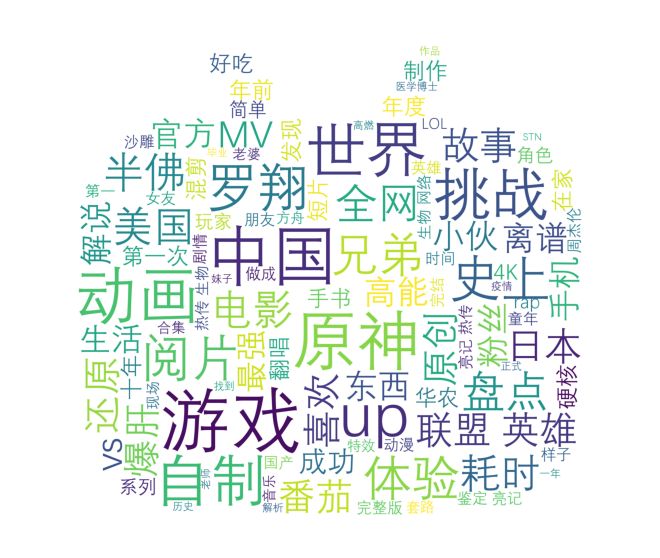

In [104]:
# Show wordcloud
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 10])
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [37]:
# Extract the video data with the top 10 views 
need_data_更新.nlargest(10,columns='view') 

,week,tname,title,owner_name,view,danmaku,reply,favorite,coin,share,like
1378,69,鬼畜,敢 杀 我 的 马？！,哦呼w,83662661,205012,51120,2000410,3273901,494725,3637950
234,19,鬼畜,【派大星的独白】一个关于正常人的故事,洛温阿特金森,81201831,387481,74179,3358930,5127115,1047579,5024849
757,45,动画,【哔哩哔哩2020拜年祭】,哔哩哔哩拜年纪,75731251,1549538,122845,2020937,3002879,386045,2945736
1166,61,鬼畜,最 强 法 海,推背兔の,60919768,145645,35419,1204478,1322621,428594,2281027
930,52,动画,“每日一遍，智商再见”,枫泽雨畔,49797314,253031,23747,1298223,1512906,442151,2480597
5310,175,生活,回村三天，二舅治好了我的精神内耗,衣戈猜想,45700011,259680,61800,2510157,6742986,2373902,5576882
658,41,生活,【现 代 圣 杯 战 争】,野纯Cz,45570772,67146,22219,1124841,1382081,437012,1973174
752,45,动画,曾火遍全网的《溯》，你是否还知道？,三笠・阿克曼,45161002,99038,24556,1905188,1975345,196656,2465485
1517,74,游戏,游戏科学新作《黑神话：悟空》13分钟实机演示,黑神话之悟空,45126334,340625,308962,1276680,3307144,1368306,3001415
3748,138,游戏,《孤勇者》（《英雄联盟：双城之战》动画剧集中文主题曲）,英雄联盟,40850160,55029,72241,1091267,1796006,285350,1899677


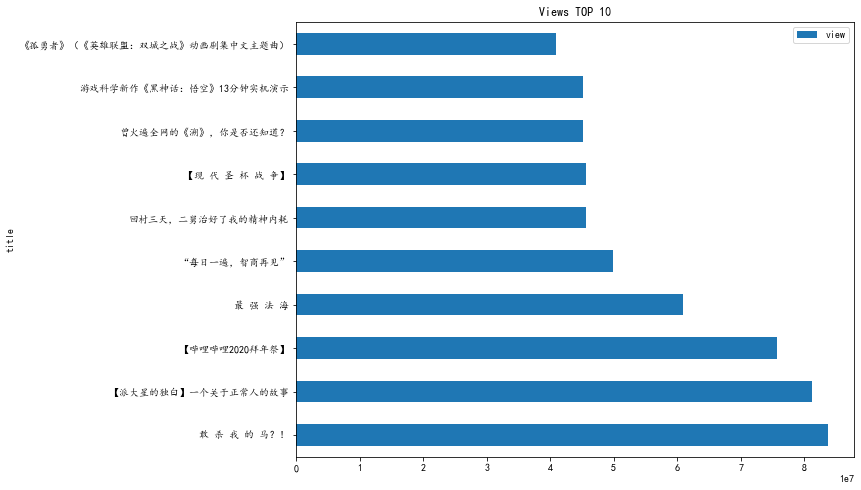

In [42]:
# Assign the 10 video data with the highest playback amount to d, and create a histogram
d=need_data_更新.nlargest(10,columns='view') 
d.plot.barh(figsize = (10,8),x='title',y='view',title='Views TOP 10')
plt.show()

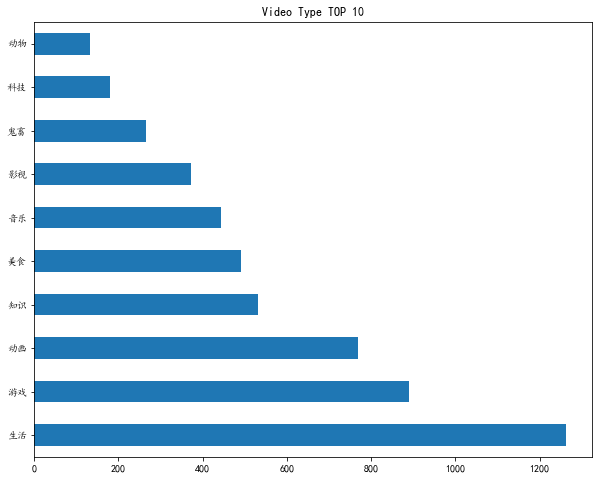

In [43]:
# Extract the 10 video types with the highest frequency
d2=need_data_更新.loc[:,'tname'].value_counts()
d2=d2.head(10)
d2.plot.barh(figsize = (10,8),title='Video Type TOP 10')
plt.show()

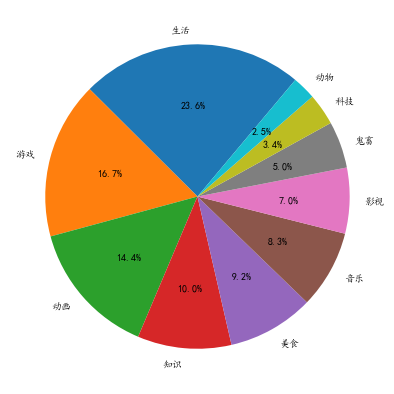

In [96]:
d2.plot(kind = 'pie',label='',startangle=50,shadow = False,figsize = (7,7), autopct = '%1.1f%%')
plt.show()

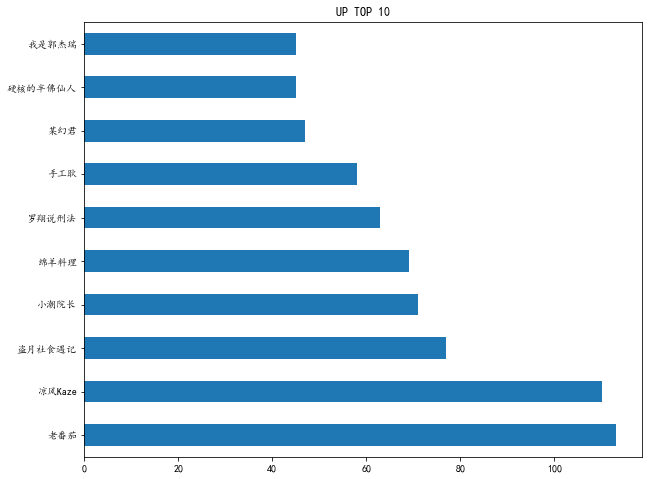

In [44]:
# Extract the data of the 10 most popular up
d3=need_data_更新.loc[:,'owner_name'].value_counts()
d3=d3.head(10)
d3.plot.barh(figsize = (10,8),title='UP TOP 10')
plt.show()

In [107]:
# 老番茄‘s videos
lfq=need_data_更新[need_data_更新["owner_name"]=="老番茄"]
lfq

,week,tname,title,owner_name,view,danmaku,reply,favorite,coin,share,like
9,1,游戏,破案大师老番茄,老番茄,6319860,15556,4094,26954,51089,2692,133221
38,3,游戏,【老番茄】史上最骚杀手(第三集),老番茄,18090210,56802,8538,462518,1188734,25418,1187119
50,4,游戏,狂野牛仔老番茄,老番茄,3337129,13586,3104,16292,36358,1684,84239
72,6,游戏,【老番茄】史上最骚杀手(第五集),老番茄,16957819,72222,9286,328009,791732,17776,835997
128,10,游戏,up主竟在游戏中做小学数学题做到崩溃！,老番茄,6248542,36846,8487,38084,62233,15523,174369
...,...,...,...,...,...,...,...,...,...,...,...
5452,178,音乐,再不多做梦，就要长大了！,老番茄,4113603,51589,15555,135576,233022,20594,500071
5540,180,游戏,MC让我泪流满面,老番茄,3688202,32839,9808,105049,334689,6021,537925
5588,181,游戏,卸载！！！！！,老番茄,4183368,41279,6417,115904,267284,5196,503404
5631,182,音乐,情商太高，也是一种负担…,老番茄,6003368,12074,7764,136828,256505,29479,634830


In [69]:
# videos' average views
lfqaverage = lfq.loc[:,'view'].values
avg = sum(lfqaverage) / len(lfqaverage)
str_avg="%.2f"%(avg)# Keep 2 decimal places
str_avg

'8635657.53'

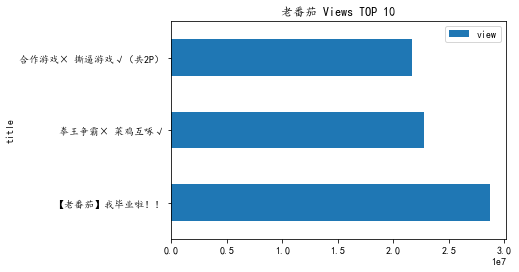

In [72]:
lfq1.plot.barh(figsize = (6,4),x='title',y='view',title='老番茄 Views TOP 10')
plt.show()

In [73]:
# 10 video types with the highest frequency of up 老番茄‘s videos
lfq2=lfq.loc[:,'tname'].value_counts()
lfq2=lfq2.head(3)
lfq2

游戏    89
生活    17
音乐     7
Name: tname, dtype: int64

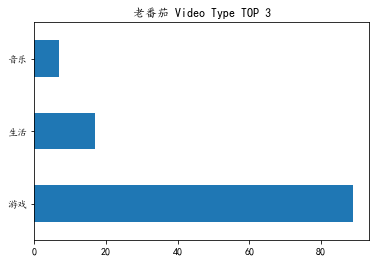

In [74]:
lfq2.plot.barh(figsize = (6,4),title='老番茄 Video Type TOP 3')
plt.show()

<AxesSubplot:title={'center':'老番茄‘video views'}, xlabel='week', ylabel='view'>

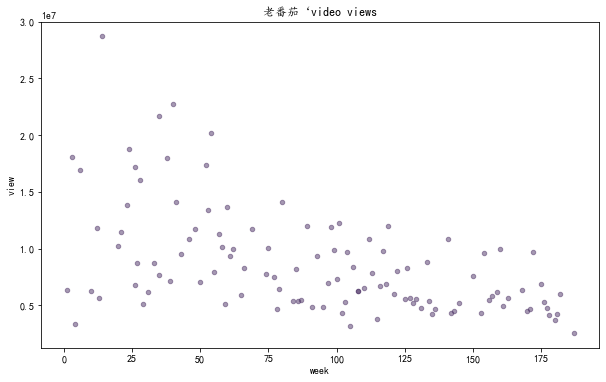

In [45]:
lfq.plot.scatter(x='week',y='view',figsize=(10,6),color=(0.3, 0.2, 0.4, 0.5),title='老番茄‘video views')

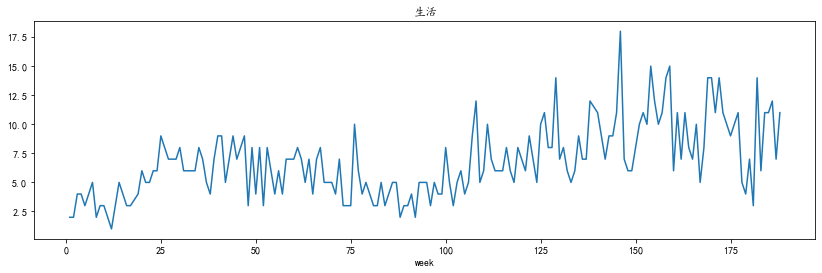

In [78]:
# Changes of video in dailylife section with the number of periods
sh = need_data_更新[need_data_更新['tname'] == '生活'].groupby(by = 'week')[['tname']].count()
sh.plot(kind = 'line', legend=False, figsize=(14,4),title='生活')
plt.show()

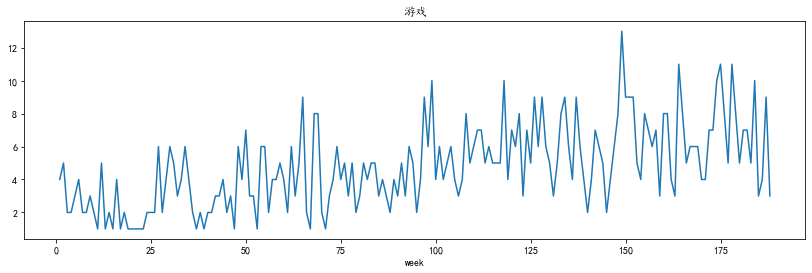

In [79]:
# Changes of video in games section with the number of periods
yx = need_data_更新[need_data_更新['tname'] == '游戏'].groupby(by = 'week')[['tname']].count()
yx.plot(kind = 'line', legend=False, figsize=(14,4),title='游戏')
plt.show()

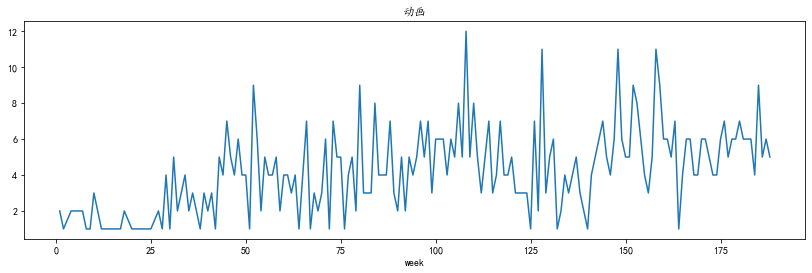

In [80]:
# Changes of video in animation section with the number of periods
dh = need_data_更新[need_data_更新['tname'] == '动画'].groupby(by = 'week')[['tname']].count()
dh.plot(kind = 'line', legend=False, figsize=(14,4),title='动画')
plt.show()

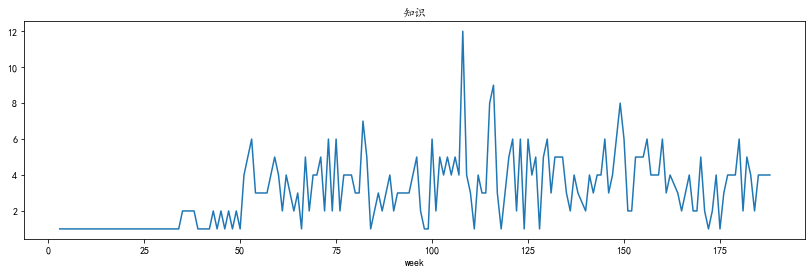

In [85]:
# Changes of video in knowledge section with the number of periods
zs = need_data_更新[need_data_更新['tname'] == '知识'].groupby(by = 'week')[['tname']].count()
zs.plot(kind = 'line', legend=False, figsize=(14,4),title='知识')
plt.show()

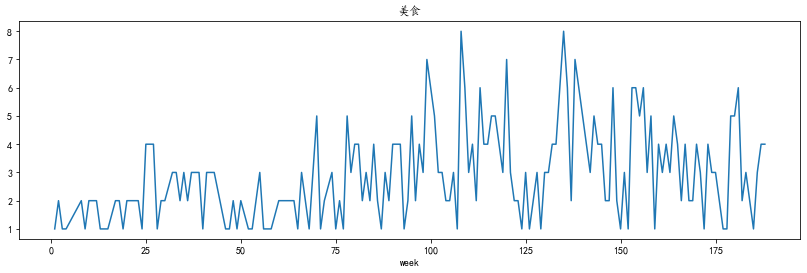

In [87]:
# Changes of video in food section with the number of periods
ms = need_data_更新[need_data_更新['tname'] == '美食'].groupby(by = 'week')[['tname']].count()
ms.plot(kind = 'line', legend=False, figsize=(14,4),title='美食')
plt.show()

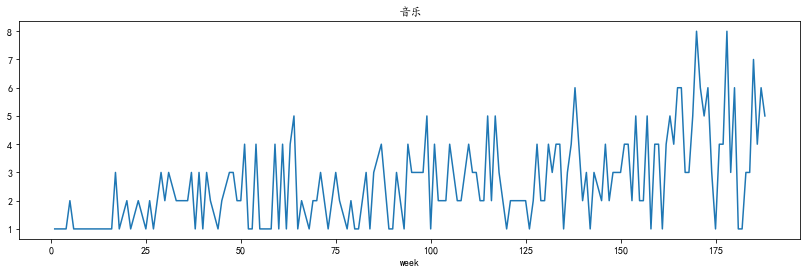

In [88]:
# Changes of video in music section with the number of periods
yy = need_data_更新[need_data_更新['tname'] == '音乐'].groupby(by = 'week')[['tname']].count()
yy.plot(kind = 'line', legend=False, figsize=(14,4),title='音乐')
plt.show()

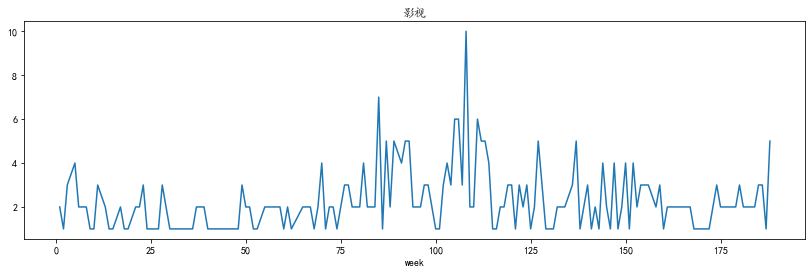

In [89]:
# Changes of video in movie section with the number of periods
ys = need_data_更新[need_data_更新['tname'] == '影视'].groupby(by = 'week')[['tname']].count()
ys.plot(kind = 'line', legend=False, figsize=(14,4),title='影视')
plt.show()

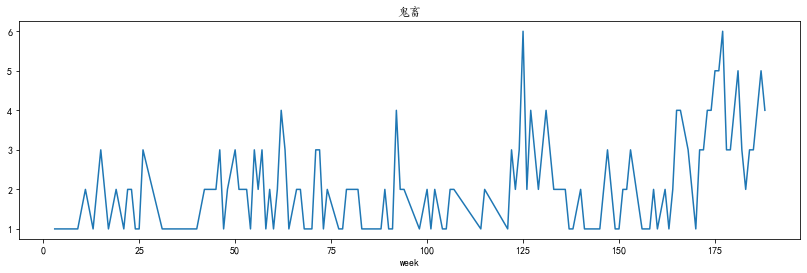

In [91]:
# Changes of video in guichu section with the number of periods
gc = need_data_更新[need_data_更新['tname'] == '鬼畜'].groupby(by = 'week')[['tname']].count()
gc.plot(kind = 'line', legend=False, figsize=(14,4),title='鬼畜')
plt.show()

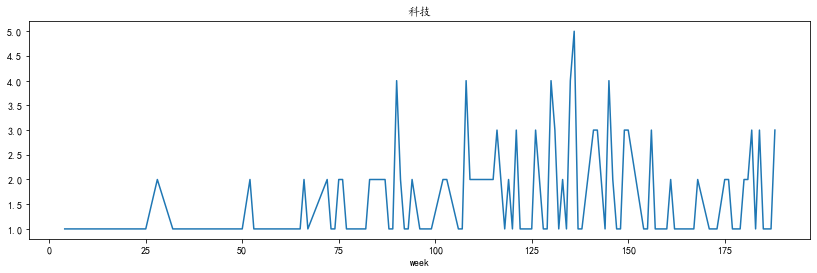

In [92]:
# Changes of video in technology section with the number of periods
kj = need_data_更新[need_data_更新['tname'] == '科技'].groupby(by = 'week')[['tname']].count()
kj.plot(kind = 'line', legend=False, figsize=(14,4),title='科技')
plt.show()

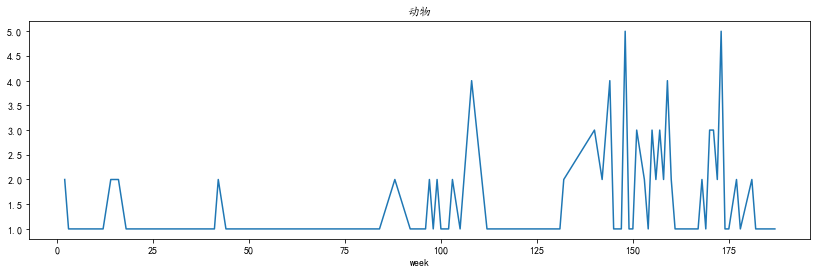

In [93]:
# Changes of video in animals section with the number of periods
dw = need_data_更新[need_data_更新['tname'] == '动物'].groupby(by = 'week')[['tname']].count()
dw.plot(kind = 'line', legend=False, figsize=(14,4),title='动物')
plt.show()